# Insurance Company

## Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

## Table of Conents
* [Data Preprocessing & Exploration](#data_process)
* [Task 1. Similar Customers](#task1)
* [Task 2. Is Customer Likely to Receive Insurance Benefit?](#task2)
* [Task 3. Regression (with Linear Regression)](#task3)
* [Task 4. Obfuscating Data](#task4)
* [Conclusion](#con)

# Data Preprocessing & Exploration <a class="anchor" id="data_process"></a>

## Initialization

In [1]:
#pip install scikit-learn --upgrade

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import math

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing

from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

from IPython.display import display
import warnings

warnings.filterwarnings("ignore")

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [3]:
df = pd.read_csv('/datasets/insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [4]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [5]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
1240,1,32.0,24200.0,1,0
2230,1,31.0,35400.0,2,0
2510,1,33.0,23800.0,1,0
95,1,52.0,31100.0,0,2
3232,0,41.0,24100.0,5,0
4226,1,23.0,37700.0,2,0
3926,0,38.0,40400.0,0,0
3675,1,35.0,46200.0,1,0
4394,0,38.0,36800.0,1,0
1263,0,44.0,48100.0,0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
gender                5000 non-null int64
age                   5000 non-null float64
income                5000 non-null float64
family_members        5000 non-null int64
insurance_benefits    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
# we may want to fix the age type (from float to int) though this is not critical
# write your conversion here if you choose:

df['age'] = df['age'].astype(int)

In [8]:
# check to see that the conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
gender                5000 non-null int64
age                   5000 non-null int64
income                5000 non-null float64
family_members        5000 non-null int64
insurance_benefits    5000 non-null int64
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [9]:
# now have a look at the data's descriptive statistics. 
# Does everything look okay?
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Eveything looks fine. We can see that median is greater theb the mean for all columns excpet for insurance_benefits which has higher mean then median.

In [10]:
df.isnull().sum()

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

In [11]:
# checking for duplicates
df.duplicated().sum()

153

We do have duplicates present, but it is not nessary to remove them for this task. Everything else looks ok with the data set and there are no missing values and all the data type are correct. 

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

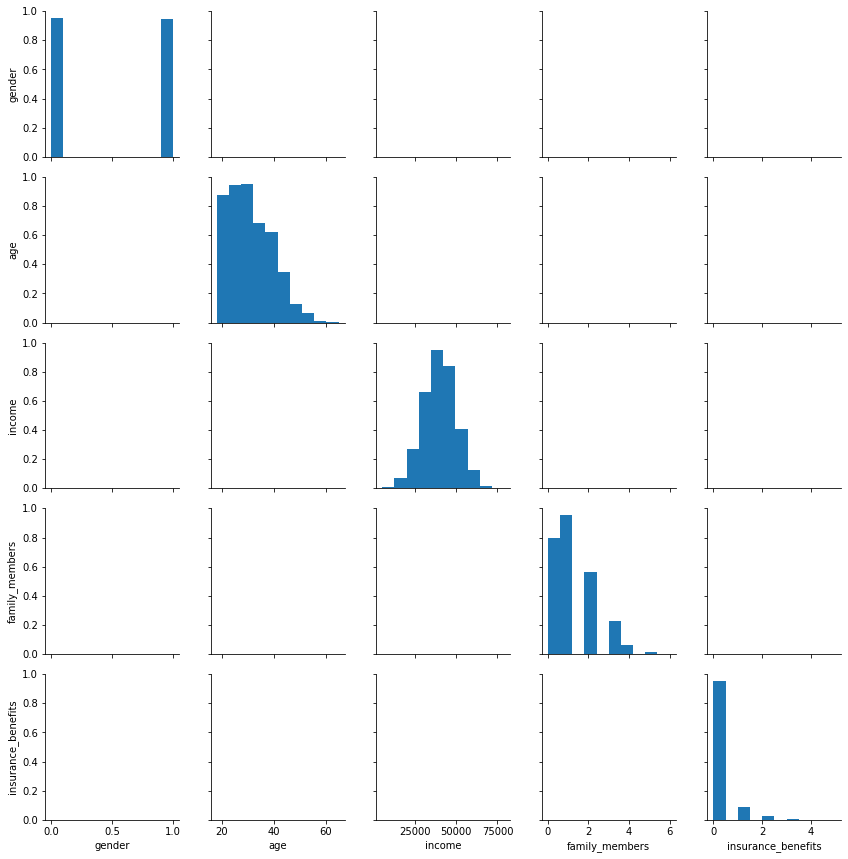

In [12]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1. Similar Customers<a class="anchor" id="task1"></a>

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [13]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [14]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """
# <your code here> 
    nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=k, metric=metric) 
    nbrs.fit(df[feature_names].values)
    nbrs_distances, nbrs_indices = nbrs.kneighbors(df.iloc[n][feature_names].values.reshape(1, -1), k, return_distance=True)

    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Scaling the data.

In [15]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [16]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
315,0.0,0.523077,0.506329,0.166667,0
109,1.0,0.307692,0.564557,0.166667,0
4429,0.0,0.569231,0.613924,0.166667,0
3240,0.0,0.384615,0.400000,0.000000,0
3197,0.0,0.584615,0.355696,0.000000,0


Now, let's get similar records for a given one for every combination

In [17]:
# euclidean distance with uscaled data
get_knn(df[feature_names], 0, 5, 'euclidean')

,gender,age,income,family_members,distance
0,1,41,49600.0,1,0.000000
2022,1,41,49600.0,0,1.000000
1225,0,42,49600.0,0,1.732051
4031,1,44,49600.0,2,3.162278
3424,0,38,49600.0,0,3.316625


In [18]:
# euclidean distance with scaled data
#df.fillna(0)
get_knn(df_scaled[feature_names], 0, 5, 'euclidean')

,gender,age,income,family_members,distance
0,1.0,0.630769,0.627848,0.166667,0.000000
2689,1.0,0.630769,0.634177,0.166667,0.006329
133,1.0,0.615385,0.636709,0.166667,0.017754
4869,1.0,0.646154,0.637975,0.166667,0.018418
3275,1.0,0.646154,0.651899,0.166667,0.028550


In [19]:
#manhattan distance with unscaled data
get_knn(df[feature_names], 0, 5, 'manhattan')

,gender,age,income,family_members,distance
0,1,41,49600.0,1,0.0
2022,1,41,49600.0,0,1.0
1225,0,42,49600.0,0,3.0
4031,1,44,49600.0,2,4.0
3424,0,38,49600.0,0,5.0


In [20]:
# manhattan distance with scaled data
get_knn(df_scaled[feature_names], 0, 5, 'manhattan')

,gender,age,income,family_members,distance
0,1.0,0.630769,0.627848,0.166667,0.000000
2689,1.0,0.630769,0.634177,0.166667,0.006329
133,1.0,0.615385,0.636709,0.166667,0.024245
4869,1.0,0.646154,0.637975,0.166667,0.025511
3365,1.0,0.630769,0.596203,0.166667,0.031646


Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

KNN data that is not scaled affect the kNN algorithm since the KNN is distance bassed algorithm which is imporves from rescalling the features. In addition, for this task we can see that the distance column for unscaled data had showed more importance to a bigger distance and has had larger values. While the sclaed data had a more smaller values interval. The reason why data is affected and this imbalance occures in the unscaled manhattan and euclidan distance alagorithm is because its affected by the magnitude. The algorithm should not be biased towards variables with higher magnitude. To overcome this problem, we can bring down all the variables to the same scale.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

The results differ from each other and differ with scaling.

# Task 2. Is Customer Likely to Receive Insurance Benefit?<a class="anchor" id="task2"></a>

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [21]:
# calculate the target
df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype(int)
df_scaled['insurance_benefits_received'] = (df_scaled['insurance_benefits'] > 0).astype(int)#<your code here>

In [22]:
# check for the class imbalance with value_counts()

# <your code here>
df['insurance_benefits_received'].value_counts()

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

In [23]:
features = df.drop(['insurance_benefits_received', 'insurance_benefits'], axis=1)
target = df['insurance_benefits_received']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size = 0.3, random_state=12345)
print(features_train.shape, target_train.shape)
print(features_test.shape, target_test.shape)

(3500, 4) (3500,)
(1500, 4) (1500,)


In [24]:
#Scaling data
scaler = StandardScaler()
scaler.fit(features_train)
train_scaled = scaler.transform(features_train)
test_scaled = scaler.transform(features_test)

In [25]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred) #, normalize='all'
    print('Confusion Matrix')
    print(cm)

In [26]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [27]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, target.shape[0])# <your code here> 
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[4436    0]
 [ 564    0]]

The probability: 0.11
F1: 0.12
Confusion Matrix
[[3957  479]
 [ 497   67]]

The probability: 0.50
F1: 0.20
Confusion Matrix
[[2280 2156]
 [ 265  299]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[   0 4436]
 [   0  564]]



In [28]:
#dummy model

class MyClassifier():
    
    def __init__(self, n_neighbors, metric , threshold):
        self.n_neighbors = n_neighbors
        self.metric = metric
        self.threshold = threshold
        self.model = NearestNeighbors(n_neighbors = n_neighbors, metric=metric)
        
        
    def fit(self, X, y):
        self.features = X
        self.target = y

        self.model.fit(self.features)
    
    def change_num_neighbors(self, new_n_neighbors):
        self.model.set_params(n_neighbors = new_n_neighbors)
    
    def predict(self, X):
        nbrs_distances, nbrs_indices = self.model.kneighbors(X, self.n_neighbors, return_distance=True)
        probabilities = []
        for elem in nbrs_indices:
            probability = self.target.iloc[elem].mean()
        probabilities.append(probability)
        return (np.array(probability) >= self.threshold).astype(int)



In [29]:
classifier = MyClassifier(n_neighbors=5, metric='manhattan', threshold=0.5)
classifier.fit(features_train, target_train)
classifier.predict(features_test)

0

In [30]:
# kNN classifier with unscaled data
unscaled_f1 = []
for k in range(1,11):
    knnc = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knnc.fit(features_train, target_train)
    knnc_pred = knnc.predict(features_test)
    f1_score = sklearn.metrics.f1_score(target_test, knnc_pred)
    unscaled_f1.append(f1_score)
    print(f'N_neighbors: {k}, F1: {f1_score:.2f}')

N_neighbors: 1, F1: 0.61
N_neighbors: 2, F1: 0.41
N_neighbors: 3, F1: 0.41
N_neighbors: 4, F1: 0.28
N_neighbors: 5, F1: 0.27
N_neighbors: 6, F1: 0.11
N_neighbors: 7, F1: 0.11
N_neighbors: 8, F1: 0.07
N_neighbors: 9, F1: 0.08
N_neighbors: 10, F1: 0.00


Best n_neighbors is 1 with a F1 score of 0.61.

In [31]:
# kNN classifier with scaled data
scaled_f1 = []
for k in range(1,11):
    knnc = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    knnc.fit(train_scaled, target_train)
    knnc_pred = knnc.predict(test_scaled)
    f1_score = sklearn.metrics.f1_score(target_test, knnc_pred)
    scaled_f1.append(f1_score)
    print(f'N_neighbors: {k}, F1: {f1_score:.2f}')

N_neighbors: 1, F1: 0.96
N_neighbors: 2, F1: 0.93
N_neighbors: 3, F1: 0.94
N_neighbors: 4, F1: 0.90
N_neighbors: 5, F1: 0.92
N_neighbors: 6, F1: 0.91
N_neighbors: 7, F1: 0.93
N_neighbors: 8, F1: 0.91
N_neighbors: 9, F1: 0.92
N_neighbors: 10, F1: 0.89


The best N_neighbors is 1 with F1 score of 0.96.

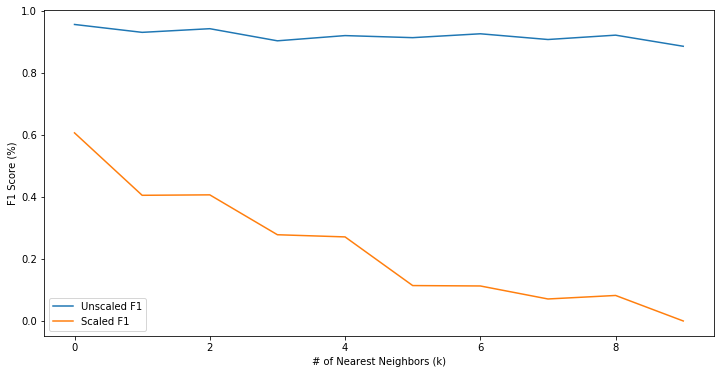

In [32]:
# Plot the results 
plt.figure(figsize=(12,6))
plt.plot(scaled_f1, label = "Unscaled F1")
plt.plot(unscaled_f1, label = 'Scaled F1')
plt.xlabel('# of Nearest Neighbors (k)')
plt.ylabel('F1 Score (%)')
plt.legend()
plt.show()

# Task 3. Regression (with Linear Regression)<a class="anchor" id="task3"></a>

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [33]:
#Creating a class of LinearRegression.

class MyLinearRegression:
    
    def __init__(self):
        self.weights = None
    
    def fit(self, X, y):
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)# <your code here>
        self.weights = weights[1:]
        self.bias = weights[0]

    def predict(self, X):
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)# <your code here>
        y_pred = X.dot(self.weights) + self.bias# <your code here>
        return y_pred


In [34]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [35]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 3.57495491e-02  1.64272726e-02 -2.60743659e-07 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


In [36]:
#scaled
X_s = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y_s = df_scaled['insurance_benefits'].to_numpy()

X_train_scal, X_test_scal, y_train_scal, y_test_scal = train_test_split(X_s, y_s, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train_scal, y_train_scal)
print(lr.weights)

y_test_pred = lr.predict(X_test_scal)
eval_regressor(y_test_scal, y_test_pred)

[ 2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


There is no difference in the matrix for scaled and unscaled data. We can see that for both scaled and unscaled data our RMSE and R2 scores are the same and the predictions of the models are the same. The only difference is the weight of the model and it is easier to interpret the scaled weights than unscaled weights.

# Task 4. Obfuscating Data<a class="anchor" id="task4"></a>

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [37]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [38]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [39]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [41]:
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

The inverse of P exists. 

Can you guess the customers' ages or income after the transformation?

In [46]:
# obfuscating data
X1 = np.dot(X,P)
X1

array([[ 6359.71527314, 22380.40467609, 18424.09074184, 46000.69669016],
       [ 4873.29406479, 17160.36702982, 14125.78076133, 35253.45577301],
       [ 2693.11742928,  9486.397744  ,  7808.83156024, 19484.86063067],
       ...,
       [ 4346.2234249 , 15289.24126492, 12586.16264392, 31433.50888552],
       [ 4194.09324155, 14751.9910242 , 12144.02930637, 30323.88763426],
       [ 5205.46827354, 18314.24814446, 15077.01370762, 37649.59295455]])

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [47]:
new_x1 = X1.dot(np.linalg.inv(P))
new_x1

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [ 1.67952800e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-6.23021448e-13,  2.90000000e+01,  2.10000000e+04,
        -2.03032656e-13],
       ...,
       [ 1.57996161e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [49]:
print('Original data')
print(X[:4])
print()
print('Transformed data')
print(X1[:4])
print()
print('Reversed (recovered) data')
print(new_x1[:4])

Original data
[[1.00e+00 4.10e+01 4.96e+04 1.00e+00]
 [0.00e+00 4.60e+01 3.80e+04 1.00e+00]
 [0.00e+00 2.90e+01 2.10e+04 0.00e+00]
 [0.00e+00 2.10e+01 4.17e+04 2.00e+00]]

Transformed data
[[ 6359.71527314 22380.40467609 18424.09074184 46000.69669016]
 [ 4873.29406479 17160.36702982 14125.78076133 35253.45577301]
 [ 2693.11742928  9486.397744    7808.83156024 19484.86063067]
 [ 5345.60393712 18803.22720286 15479.14837264 38663.06186284]]

Reversed (recovered) data
[[ 1.00000000e+00  4.10000000e+01  4.96000000e+04  1.00000000e+00]
 [ 1.67952800e-12  4.60000000e+01  3.80000000e+04  1.00000000e+00]
 [-6.23021448e-13  2.90000000e+01  2.10000000e+04 -2.03032656e-13]
 [-1.08907770e-12  2.10000000e+01  4.17000000e+04  2.00000000e+00]]


You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

The reason why some values are not exactly the same in the orginal data is because of the limitations of floating point arithmetic.

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

The predicted values of wP are going to be the same values of w multiplied for the matrice P. By doing so the quality of the Linear Regression will remain the same and return the same results RMSE. This means that the algorithm can perform the task with the same root squared error and reobtain the real data from obfuscated predictions.

**Analytical proof**

Given $$ w_P = [(XP)^T XP]^{-1} (XP)^T y $$

 Use transpose property $$ 1: w_P = [X^TP^T XP]^{-1} X^TP^Ty $$

Rearrage matrix $$  2: w_P = [P^T (X^TX) P]^{-1} X^TP^Ty $$

Rearrage matrix by bringing inverse in $$  3: w_P = P^{-1} (X^TX) (P^T)^{-1} P^TX^Ty $$

Apply identity matrix for $(P^T)^{-1} * P^T = I$ $$  4: w_P = P^-1 (X^TX) IX^Ty $$

Multiplicative identity property $X^T * I = X^T$   $$  5: w_P = P^{-1} (X^TX) X^Ty $$
Subsitution of w = $(X^TX)^{-1} X^Ty $    $$  6: w_P = P^{-1}w$$

Prediction with $wp$:

Given $y = Xw$ which is  similar to $ 1: y' = X'wp$

So, $X' = XP$ and $ wp = P^{-1}w$

$y' = XP * P^{-1}w = XIw$

Therefore,
$y' = Xw = y$


Matrix Properties which were used in Linear Algebra

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [52]:
# square matrix P of random numbers
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [53]:
# P is invertible
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

In [55]:
# linear regression on orginal data set
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]
# features
X = df_pn.to_numpy()

# target
y = df["insurance_benefits"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()
lr.fit(X_train, y_train)
print(lr.weights)
test_pred = lr.predict(X_test)
eval_regressor(y_test, test_pred)

[ 1.64272726e-02  3.57495491e-02 -2.60743659e-07 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


In [57]:
# linear regression with Obfuscation
X1 = np.dot(X,P)

X_train_obs, X_test_obs, y_train_obs, y_test_obs = train_test_split(X1, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()
lr.fit(X_train_obs, y_train_obs)
print(lr.weights)
y_test_pred = lr.predict(X_test_obs)
eval_regressor(y_test_obs, y_test_pred)

[-0.05791721 -0.01546567  0.09871889 -0.02397536]
RMSE: 0.34
R2: 0.66


The RMSE and R2 are the same for Obfuscation and the original data set. It was shown mathematically that they should be the same.

# Conclusion<a class="anchor" id="con"></a>

For this project, there have been 4 primary tasks done.

In Task 1 we did data pre-processing and scaling our data. From the data cleaning, we found there were no missing values but there were duplicates found. In addition, we wrote a function that returns k nearest neighbors for an  𝑛𝑡ℎ object based on a specified distance metric. These specified metrics were euclidian and manhattan. From this function, we were able to see if scaling affects the kNN algorithm, and it does since the magnitude affects the metric and for these distance algorithms scaling is an important task that will help the data.

In Task 2 we did some more evaluations on whether the kNN classification approach can do better than a dummy model. We implemented a dummy model and kNN classifier which measured its quality with the F1 metric for k=1 to 10 for both the original data and the scaled one. 

With Task 3 we used a linear regression model to evaluate 2 different metrics. The first is the Root mean squared error (RMSE) and R2 score, which perform predictions on scaled and unscaled data. By doing this we found that there is not any different and the RMSE for scaled and unscaled data. The results for both calculated was 0.34 and the R2 score was 66% for both.

In Task 4 we implemented data masking, or data obfuscation by proving that the algorithm works correctly. The analytical proof was to see if the transformation does not affect RMSE. In addition, we implemented a test in Linear Regression with our Obfuscation data to compare the predicted values and the RMSE,  𝑅2  metric values. We found that there are no differences between the values since they are very close and the same.